<a href="https://colab.research.google.com/github/Nadaramadan1/Elevvo-internship-projects/blob/main/Student_performance_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/StudentPerformanceFactors (1).csv')
data.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
data.shape

(6607, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0])
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0])

In [ ]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
categorical_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]


In [ ]:
for col in categorical_cols:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'Parental_Involvement': ['Low' 'Medium' 'High']
Unique values in 'Access_to_Resources': ['High' 'Medium' 'Low']
Unique values in 'Extracurricular_Activities': ['No' 'Yes']
Unique values in 'Motivation_Level': ['Low' 'Medium' 'High']
Unique values in 'Internet_Access': ['Yes' 'No']
Unique values in 'Family_Income': ['Low' 'Medium' 'High']
Unique values in 'Teacher_Quality': ['Medium' 'High' 'Low']
Unique values in 'School_Type': ['Public' 'Private']
Unique values in 'Peer_Influence': ['Positive' 'Negative' 'Neutral']
Unique values in 'Learning_Disabilities': ['No' 'Yes']
Unique values in 'Parental_Education_Level': ['High School' 'College' 'Postgraduate']
Unique values in 'Distance_from_Home': ['Near' 'Moderate' 'Far']
Unique values in 'Gender': ['Male' 'Female']


In [ ]:
def encode_input():
    label_map = {
        "Low": 0, "Medium": 1, "High": 2,
        "High School": 0, "College": 1, "Postgraduate": 2,
        "Near": 0, "Moderate": 1, "Far": 2
    }

    binary_map = {
        "No": 0, "Yes": 1,
        "Public": 0, "Private": 1,
        "Male": 0, "Female": 1
    }

    peer_map = {
        "Negative": [0, 0],
        "Neutral": [1, 0],
        "Positive": [0, 1]
    }

    features = [
        hours_studied,
        attendance,
        label_map[parental_involvement],
        label_map[access_to_resources],
        binary_map[extracurricular_activities],
        sleep_hours,
        previous_scores,
        label_map[motivation_level],
        binary_map[internet_access],
        tutoring_sessions,
        label_map[family_income],
        label_map[teacher_quality],
        binary_map[school_type],
        physical_activity,
        binary_map[learning_disabilities],
        label_map[parental_education_level],
        label_map[distance_from_home],
        binary_map[gender],
        *peer_map[peer_influence]  # two columns
    ]
    return np.array(features).reshape(1, -1)



In [ ]:
data = pd.get_dummies(data, columns=['Peer_Influence'], drop_first=True)
data['Peer_Influence_Neutral'] = data['Peer_Influence_Neutral'].astype(int)
data['Peer_Influence_Positive'] = data['Peer_Influence_Positive'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Physical_Activity           6607 non-null   int64
 14  Learning

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(data, col)
    outlier_summary[col] = len(outliers)

print(outlier_summary)

{'Hours_Studied': 43, 'Attendance': 0, 'Parental_Involvement': 0, 'Access_to_Resources': 0, 'Extracurricular_Activities': 0, 'Sleep_Hours': 0, 'Previous_Scores': 0, 'Motivation_Level': 0, 'Internet_Access': 499, 'Tutoring_Sessions': 430, 'Family_Income': 0, 'Teacher_Quality': 0, 'School_Type': 0, 'Physical_Activity': 0, 'Learning_Disabilities': 695, 'Parental_Education_Level': 0, 'Distance_from_Home': 0, 'Gender': 0, 'Exam_Score': 104, 'Peer_Influence_Neutral': 0, 'Peer_Influence_Positive': 0}


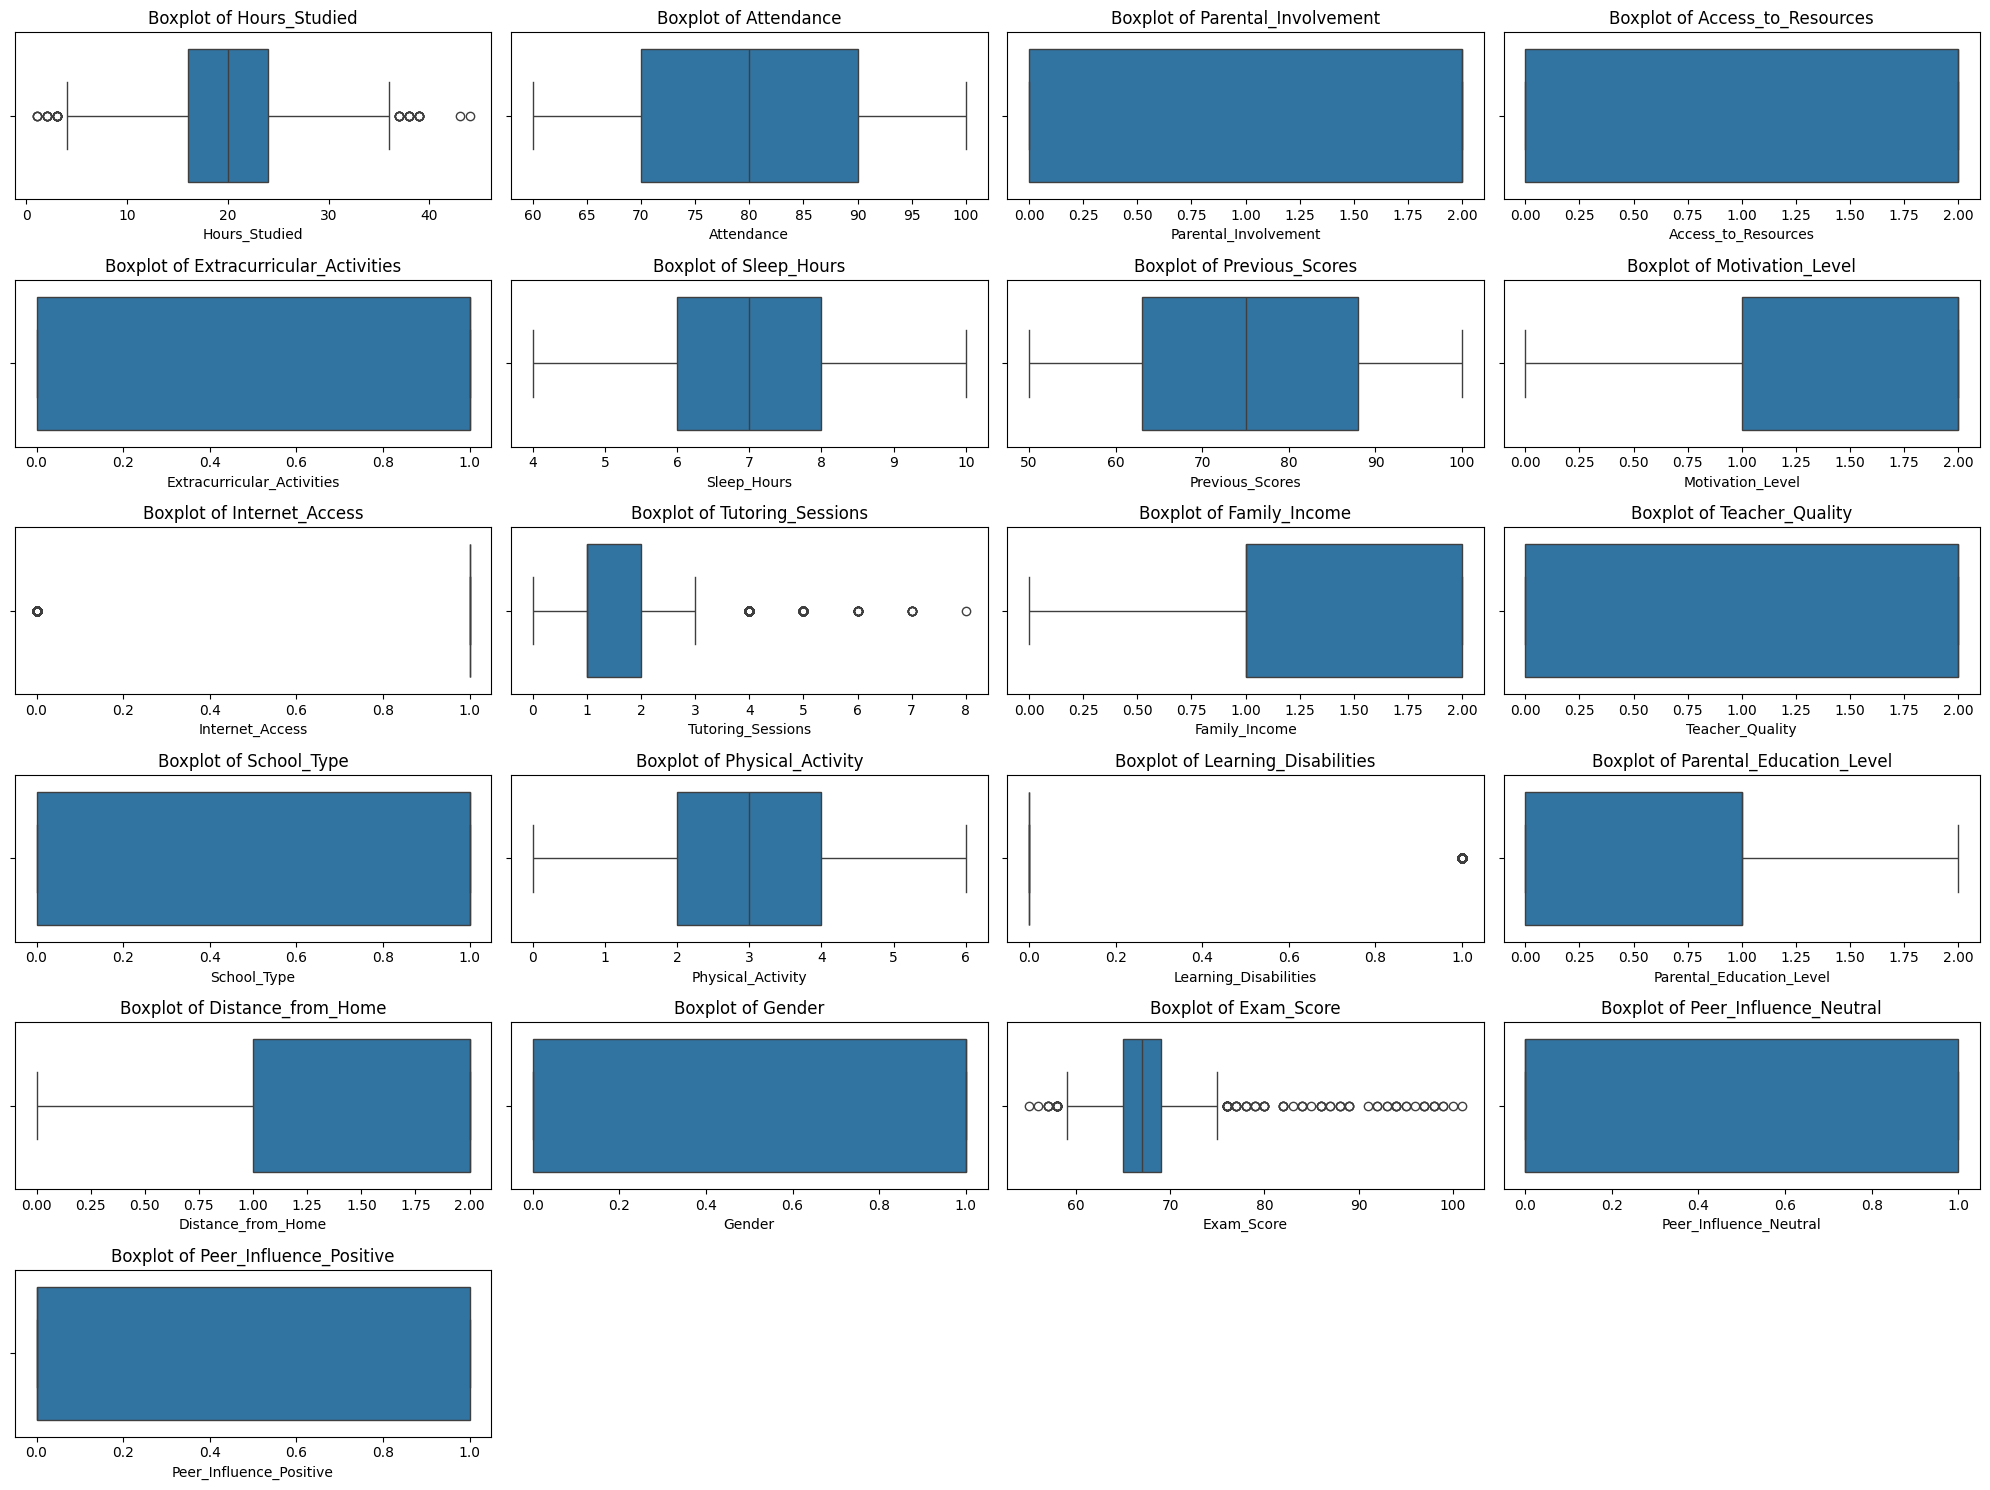

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot grid
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)  # Adjust rows/columns based on number of features
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

In [ ]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

for col in ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']:
    data = cap_outliers_iqr(data, col)


In [ ]:
data.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Peer_Influence_Neutral,Peer_Influence_Positive
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,...,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.971848,79.977448,1.220070,1.203421,0.596035,7.02906,75.070531,1.307553,0.924474,1.436355,...,1.311185,0.695929,2.967610,0.105191,0.896473,1.498411,0.577267,67.127138,0.392311,0.399273
std,5.951016,11.547475,0.865634,0.871783,0.490728,1.46812,14.399784,0.782515,0.264258,1.096018,...,0.896574,0.460048,1.031231,0.306823,0.698511,0.670260,0.494031,3.372908,0.488302,0.489786
min,4.000000,60.000000,0.000000,0.000000,0.000000,4.00000,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,65.000000,0.000000,0.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,67.000000,0.000000,0.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,69.000000,1.000000,1.000000
max,36.000000,100.000000,2.000000,2.000000,1.000000,10.00000,100.000000,2.000000,1.000000,3.500000,...,2.000000,1.000000,6.000000,1.000000,2.000000,2.000000,1.000000,75.000000,1.000000,1.000000


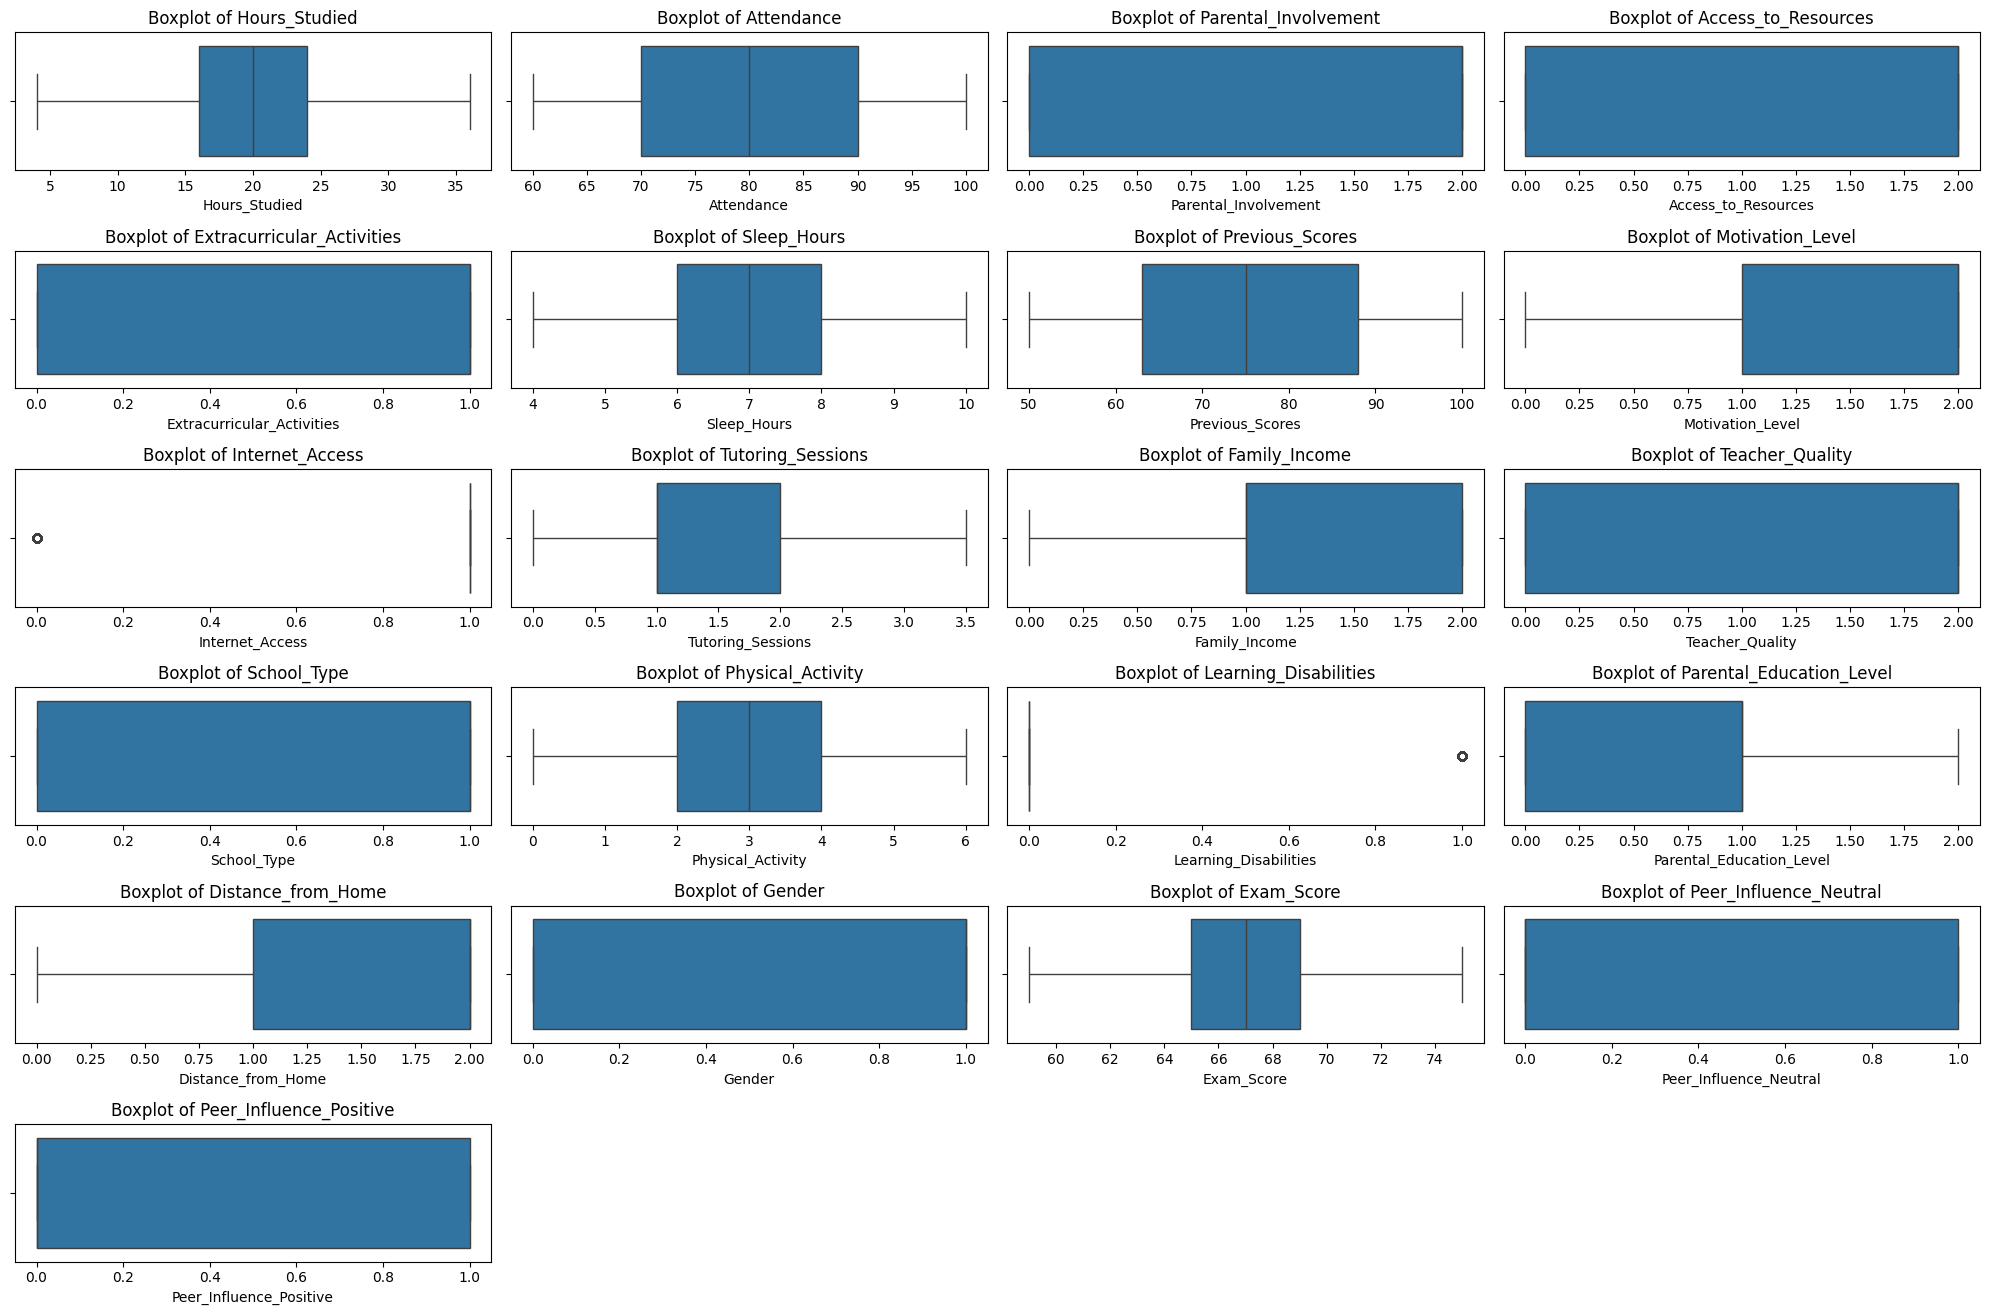

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(7, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()


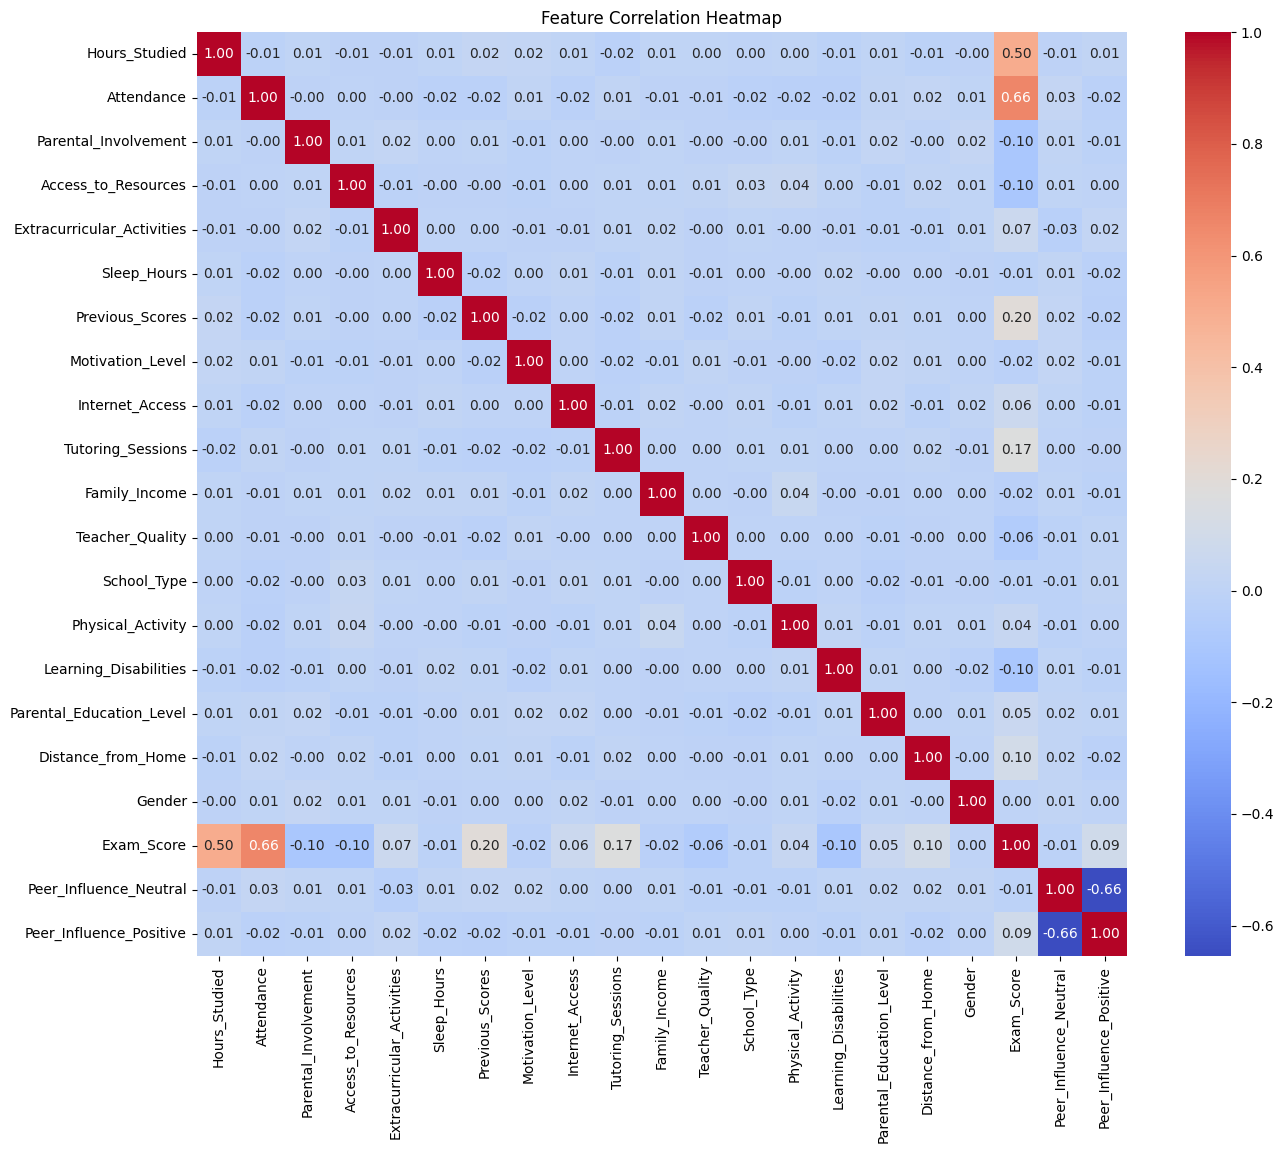

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
def categorize_score(score):
    if score < 65:
        return 'Low'
    elif score < 75:
        return 'Medium'
    else:
        return 'High'

data['Performance_Level'] = data['Exam_Score'].apply(categorize_score)


In [ ]:
data['Study_Attendance'] = data['Hours_Studied'] * data['Attendance']
data['Motivation_Resources'] = data['Motivation_Level'] * data['Access_to_Resources']


In [ ]:
data['Low_Attendance'] = (data['Attendance'] < 70).astype(int)
data['High_Tutoring'] = (data['Tutoring_Sessions'] > 2).astype(int)


In [ ]:
data['Parental_Support'] = data['Parental_Involvement'] + data['Parental_Education_Level']


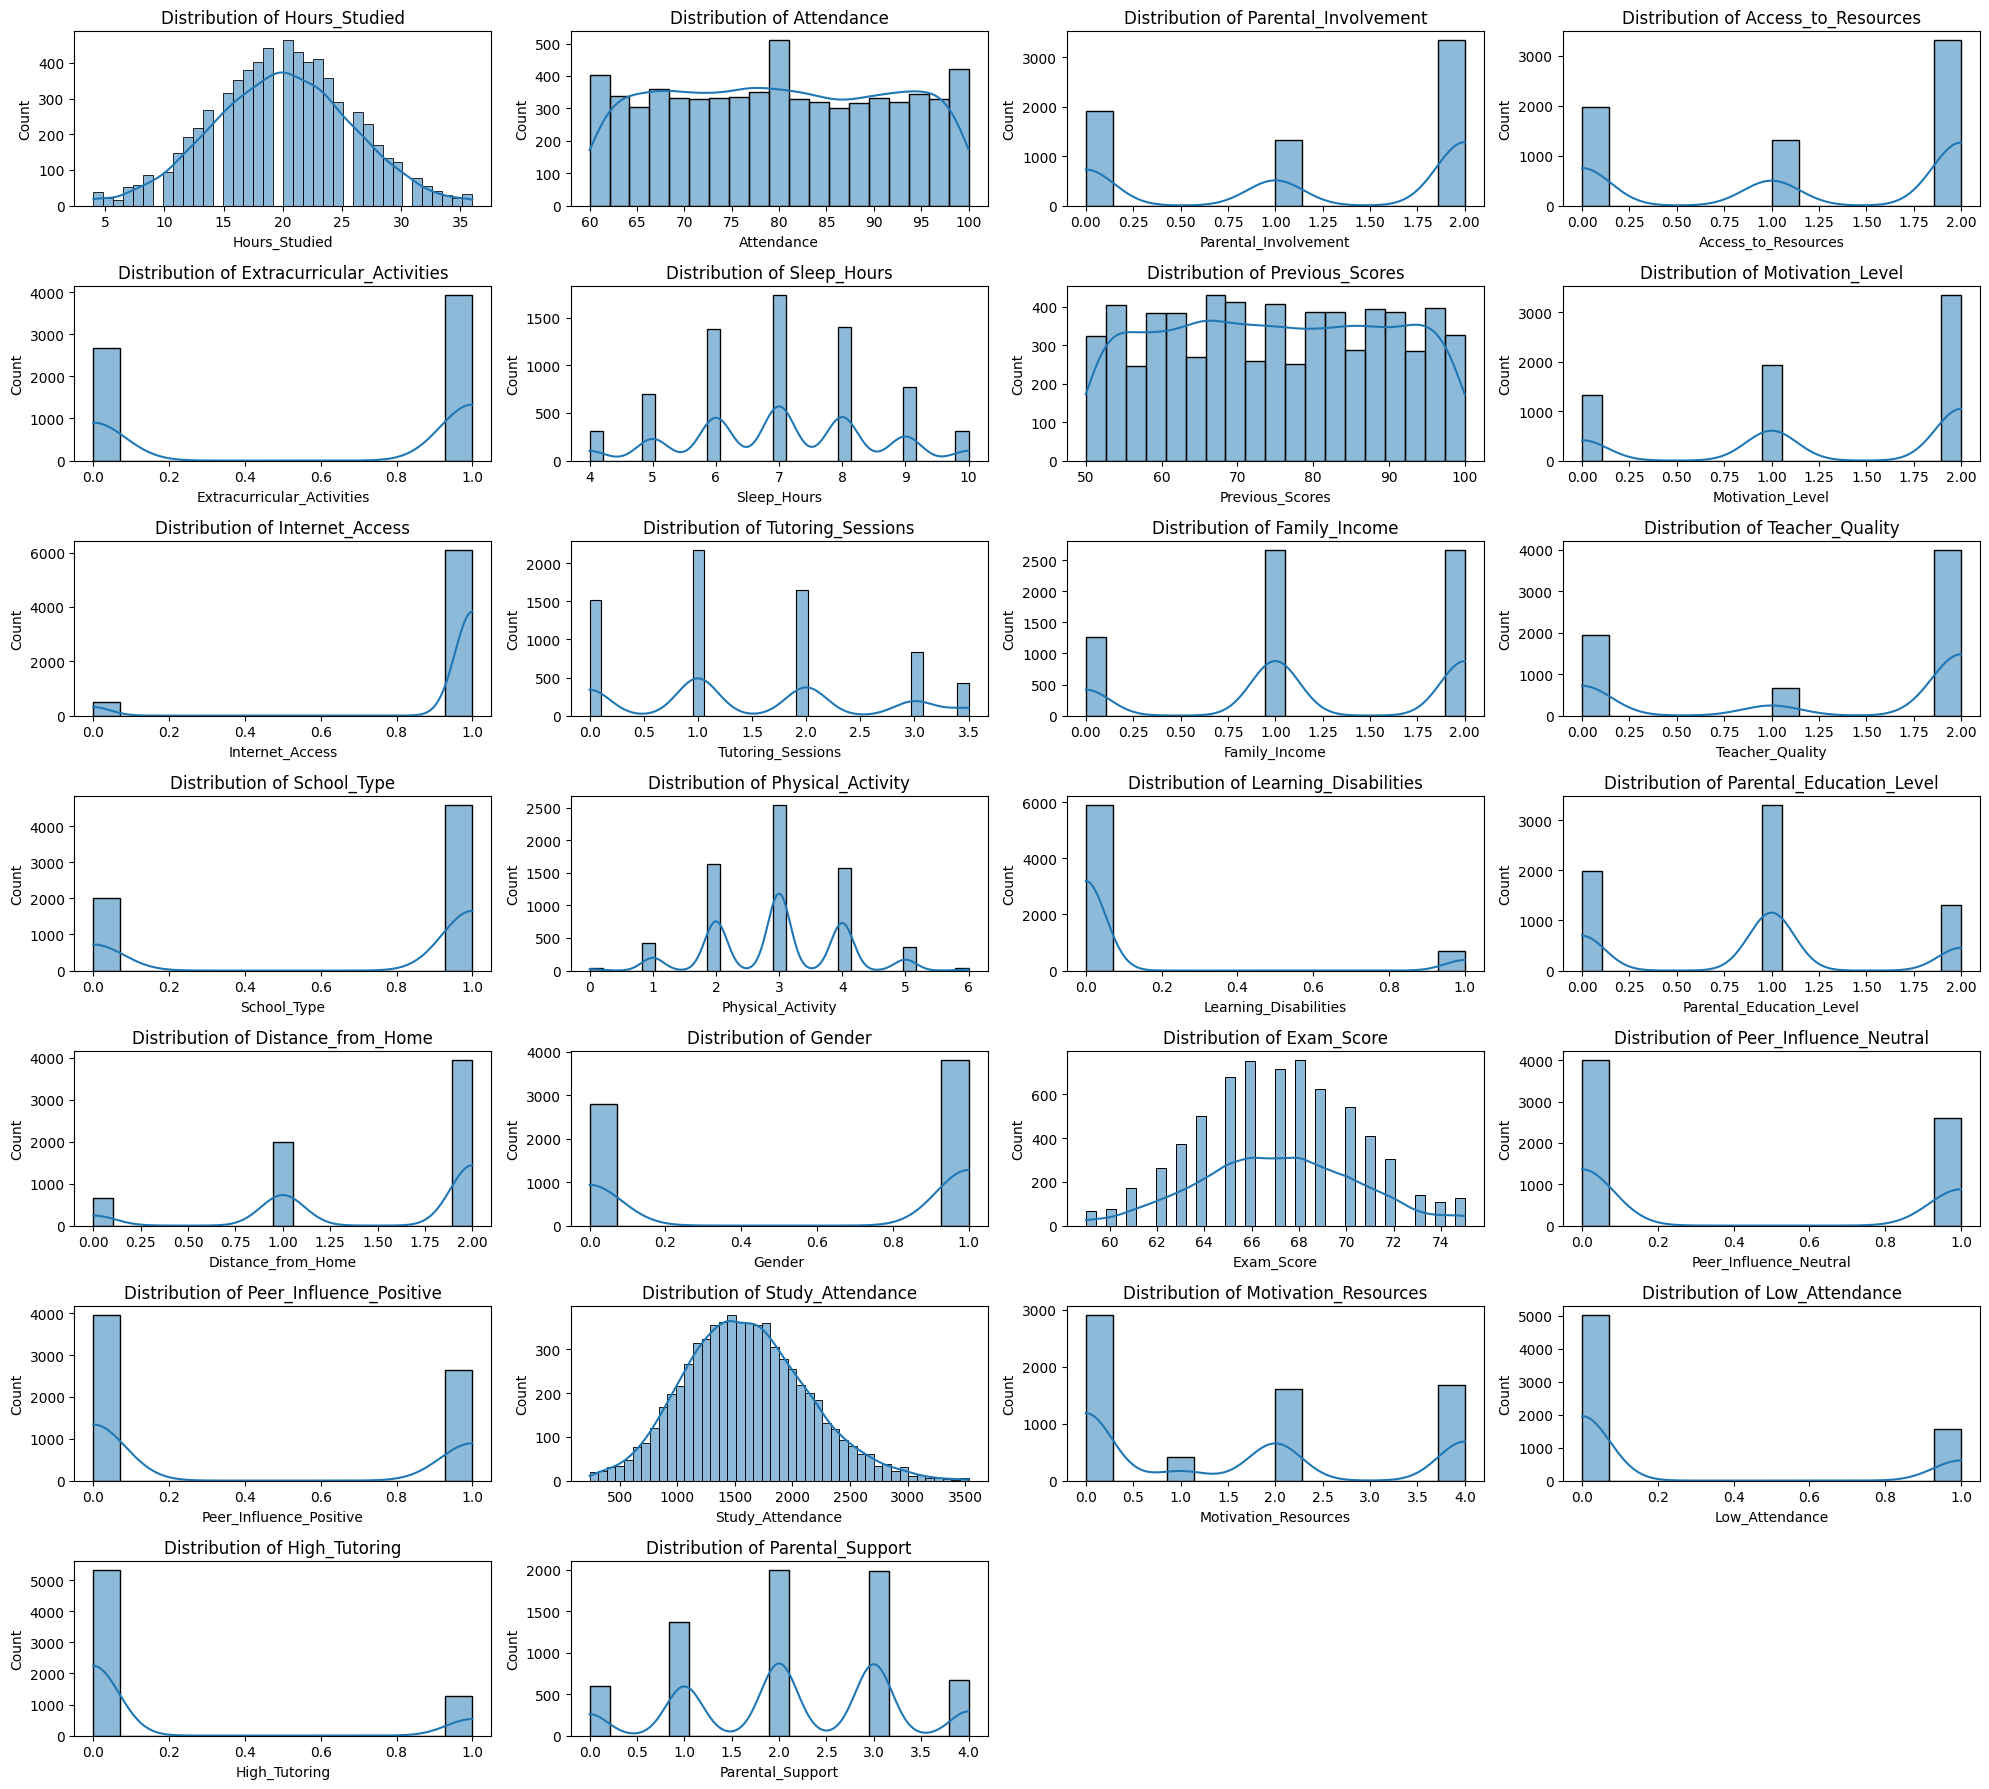

In [ ]:
plt.figure(figsize=(20, 18)) # Increased figure height for more rows
for i, col in enumerate(data.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(7, 4, i)  # Changed to 7 rows to accommodate 28 plots
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

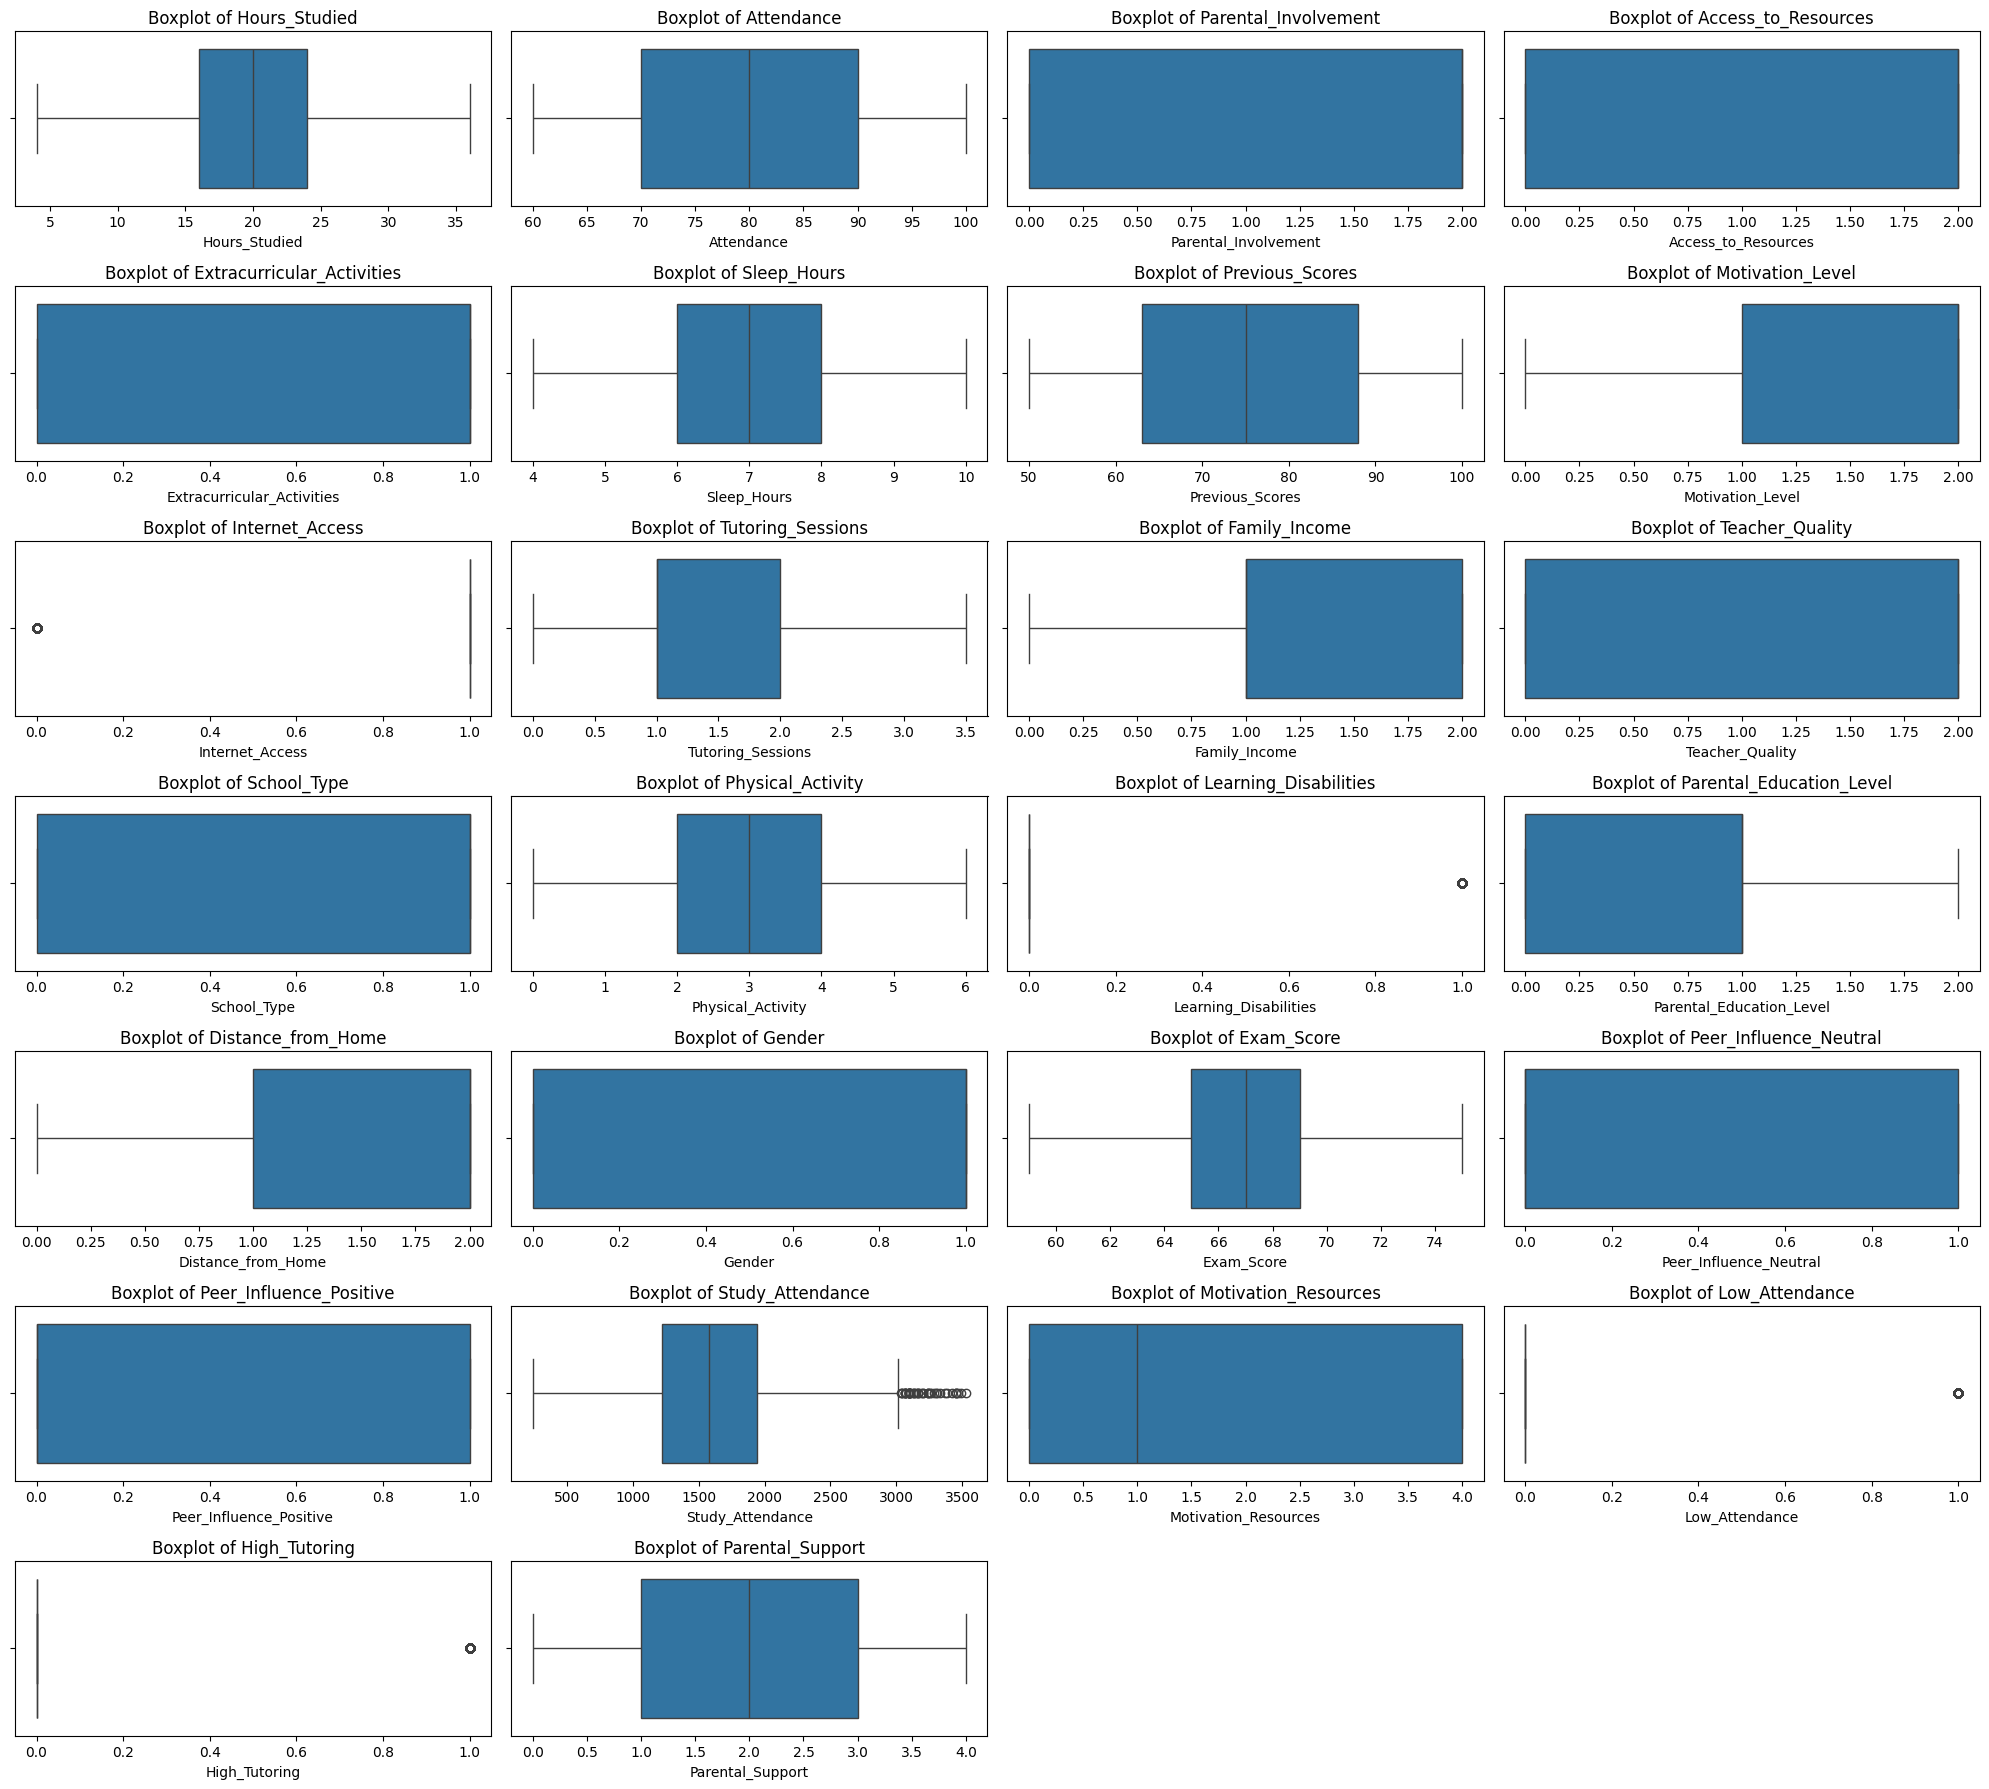

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18)) # Increased figure height for more rows
for i, col in enumerate(data.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(7, 4, i) # Changed to 6 rows to accommodate 24 plots
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

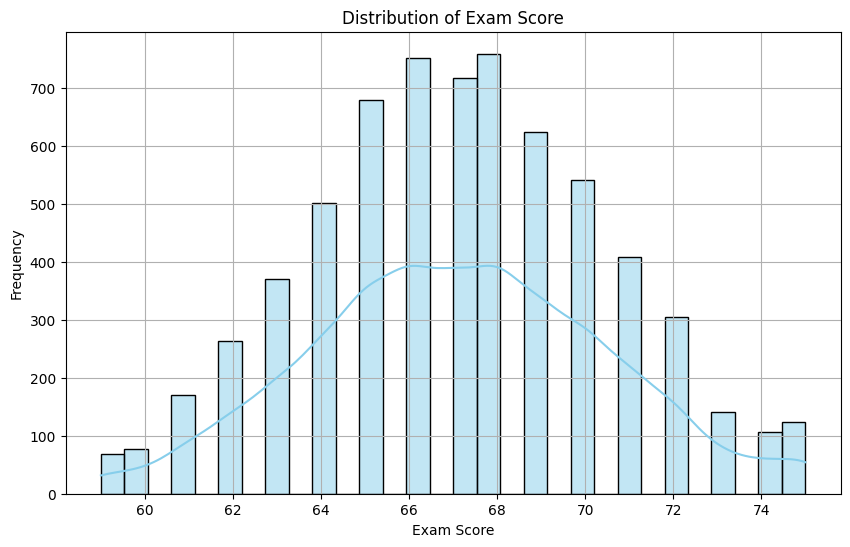

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Hours_Studied', 'Attendance', 'Previous_Scores']] = scaler.fit_transform(
    data[['Hours_Studied', 'Attendance', 'Previous_Scores']]
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
X = data.drop(['Exam_Score', 'Performance_Level'], axis=1)
y = data['Exam_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 1.32
R² Score: 0.85


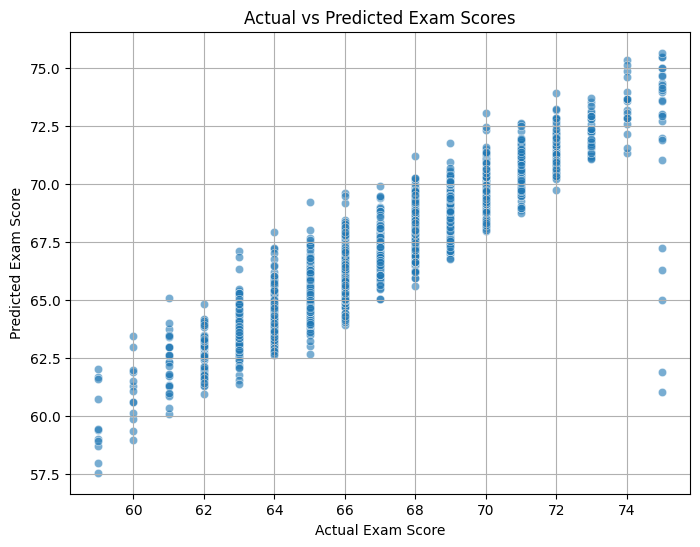

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target from the updated data DataFrame
X = data.drop(['Exam_Score', 'Performance_Level'], axis=1)
y = data['Exam_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degree 2 polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluation
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial RMSE: {rmse_poly:.2f}")
print(f"Polynomial R² Score: {r2_poly:.2f}")

Polynomial RMSE: 0.82
Polynomial R² Score: 0.94


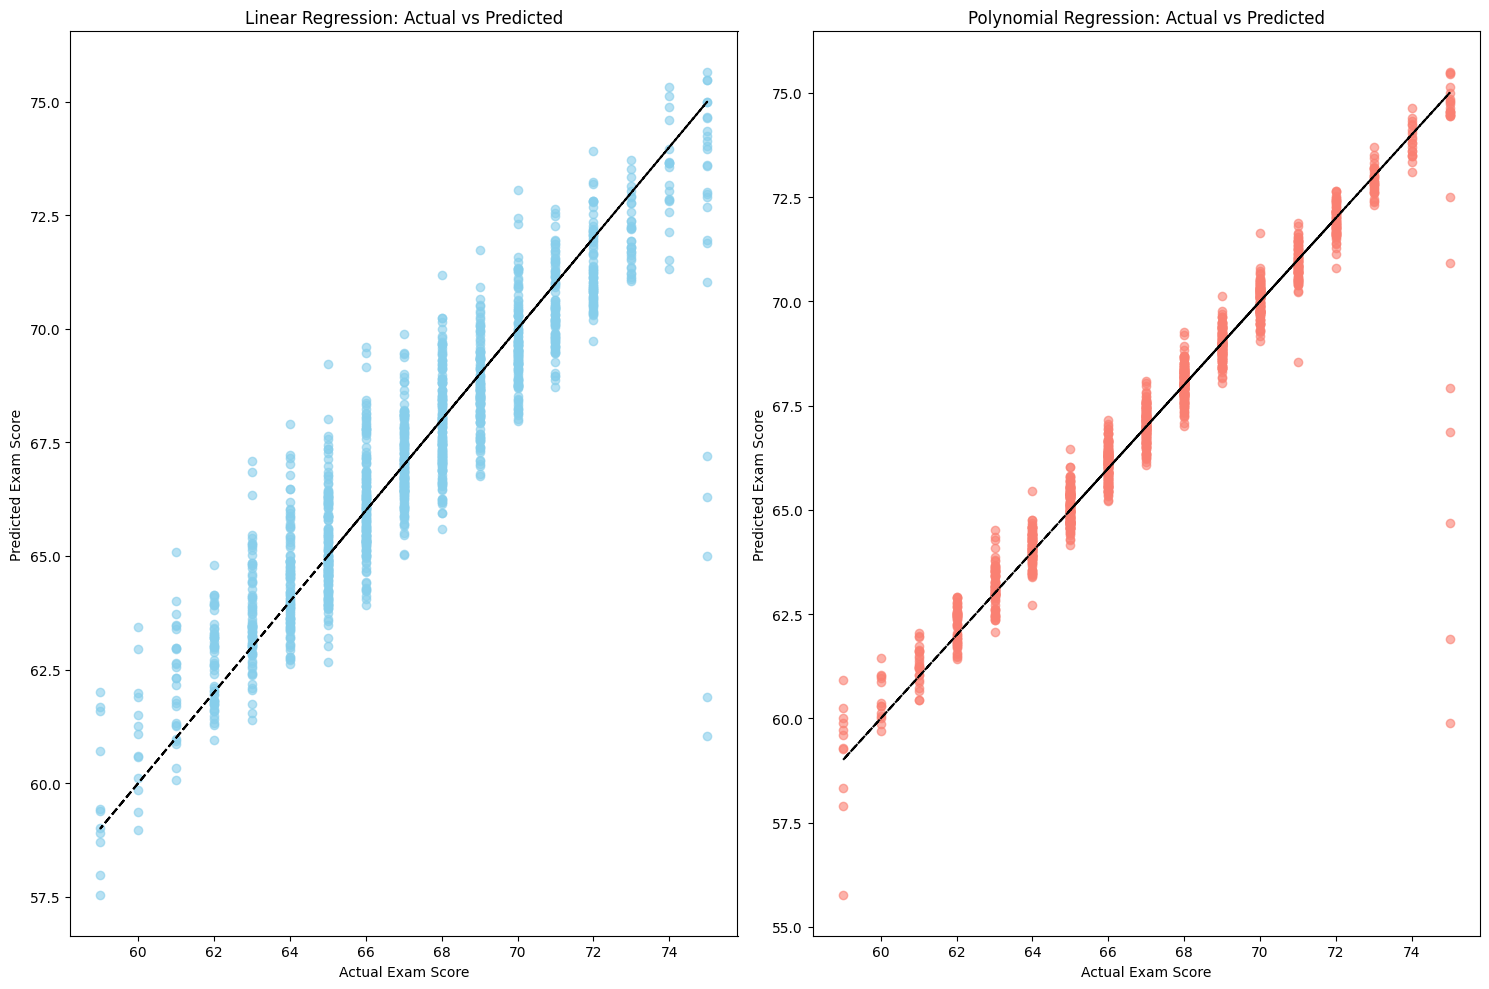

In [ ]:
# Linear Regression
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='salmon')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# ✅ Features and target
X = data.drop(columns=['Exam_Score', 'Performance_Level'])
y = data['Exam_Score']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_train_pred_lin = lin_model.predict(X_train)
y_test_pred_lin = lin_model.predict(X_test)

rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
r2_train_lin = r2_score(y_train, y_train_pred_lin)

rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
r2_test_lin = r2_score(y_test, y_test_pred_lin)

# ✅ Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
r2_train_poly = r2_score(y_train, y_train_pred_poly)

rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# ✅ Print results
print(" Linear Regression:")
print(f"Train RMSE: {rmse_train_lin:.2f}, Train R²: {r2_train_lin:.2f}")
print(f"Test RMSE: {rmse_test_lin:.2f}, Test R²: {r2_test_lin:.2f}")

print("\n Polynomial Regression:")
print(f"Train RMSE: {rmse_train_poly:.2f}, Train R²: {r2_train_poly:.2f}")
print(f"Test RMSE: {rmse_test_poly:.2f}, Test R²: {r2_test_poly:.2f}")

 Linear Regression:
Train RMSE: 1.38, Train R²: 0.83
Test RMSE: 1.32, Test R²: 0.85

 Polynomial Regression:
Train RMSE: 0.86, Train R²: 0.93
Test RMSE: 0.82, Test R²: 0.94


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for sqrt

# ✅ Features and target
X = data.drop(columns=['Exam_Score', 'Performance_Level'])
y = data['Exam_Score']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# ✅ Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)


    print(f"🔹 {name}:")
    print(f"Train RMSE: {rmse_train:.2f}, Train R²: {r2_train:.2f}")
    print(f"Test RMSE: {rmse_test:.2f}, Test R²: {r2_test:.2f}")
    print("-" * 40)

    return rmse_train, r2_train, rmse_test, r2_test

# ✅ Run evaluations and store results
rmse_train_rf, r2_train_rf, rmse_test_rf, r2_test_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, name="Random Forest")
rmse_train_gb, r2_train_gb, rmse_test_gb, r2_test_gb = evaluate_model(gb_model, X_train, X_test, y_train, y_test, name="Gradient Boosting")

🔹 Random Forest:
Train RMSE: 0.53, Train R²: 0.98
Test RMSE: 1.31, Test R²: 0.85
----------------------------------------
🔹 Gradient Boosting:
Train RMSE: 0.99, Train R²: 0.91
Test RMSE: 1.03, Test R²: 0.91
----------------------------------------


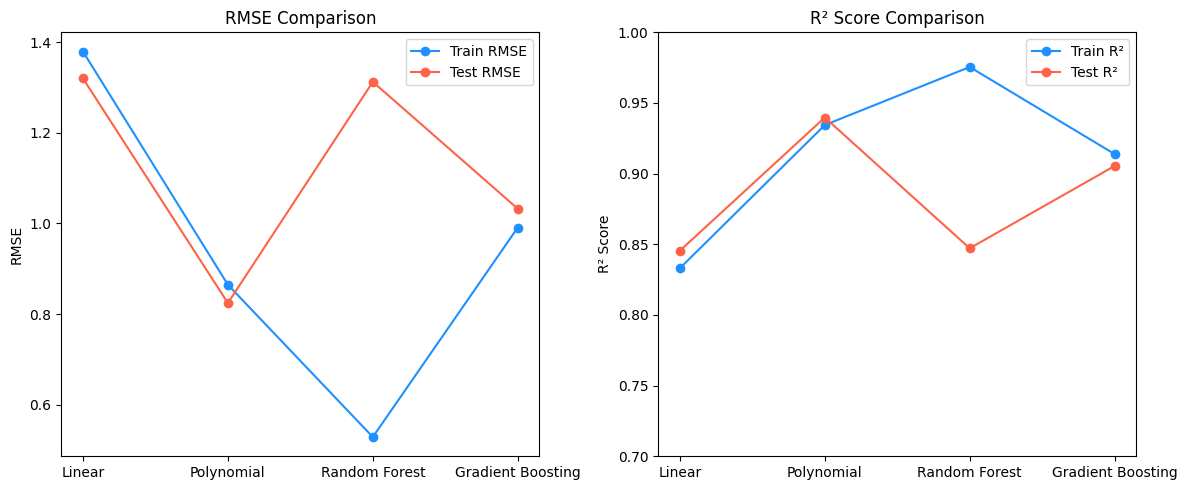

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual results
models = ['Linear', 'Polynomial', 'Random Forest', 'Gradient Boosting']
rmse_train = [rmse_train_lin, rmse_train_poly, rmse_train_rf, rmse_train_gb]
rmse_test  = [rmse_test_lin, rmse_test_poly, rmse_test_rf, rmse_test_gb]
r2_train   = [r2_train_lin, r2_train_poly, r2_train_rf, r2_train_gb]
r2_test    = [r2_test_lin, r2_test_poly, r2_test_rf, r2_test_gb]

# Plot RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(models, rmse_train, marker='o', label='Train RMSE', color='dodgerblue')
plt.plot(models, rmse_test, marker='o', label='Test RMSE', color='tomato')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)
plt.plot(models, r2_train, marker='o', label='Train R²', color='dodgerblue')
plt.plot(models, r2_test, marker='o', label='Test R²', color='tomato')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0.7, 1.0)
plt.legend()

plt.tight_layout()
plt.show()